<a href="https://colab.research.google.com/github/cathemesquita/Colab_notebooks/blob/main/CCM559.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> Regiões do implante:
      
  - Córtex cingulado (canais 9-12; 13-16; 17-20; 21-24);
  - Córtex pré-límbico (canais 25-28 e 29-32);
  - Córtex infra-límbico (canais 1-4 e 5-8);
  


> # Bibliotecas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [ ]:
pip install open-ephys-python-tools --root-user-action=ignore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.4/380.4 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for open-ephys-python-tools: filename=open_ephys_python_tools-0.1.3-py3-none-any.whl size=38630 sha256=fc366918c7fe49a2530f43867ae579249d8fa0046e8dbe4d8553823ef271613d
  Stored in directory: /root/.cache/pip/wheels/16/67/d4/e28dd711954523828535c0a3462009cf504ffc731d9e2dbf89
  Created wheel for zmq: filename=zmq-0.0.0-py3-none-any.whl size=1274 sha256=6460cf34b7df07dfca468376cd2bdad75f461030280a3657bcd2602493a6dd5f
  Stored in directory: /root/.cache/pip/wheels/36/72/fe/515d261447dfa5c2ac68330cab97f0438477e30f6b61ee9f7d
Successfully built open-ephys-python-tools zmq


In [ ]:
! pip install pactools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 56.3 MB/s eta 0:00:00


In [ ]:
pip install --upgrade pyopenephys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for quantities: filename=quantities-0.13.0-py3-none-any.whl size=77860 sha256=22162aae16270f0f60cedde22999dc98b65b2044725cb637e16e201c7d572c16
  Stored in directory: /root/.cache/pip/wheels/b9/e9/39/725391283a043047b66329a69c8acc5d5d360f23e274065c20
Successfully built quantities


In [ ]:
pip install -U tensorpac

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.6/423.6 kB 7.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pyopenephys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from numpy.fft import fft, rfft
from scipy import signal
import math
import scipy.fftpack
from scipy.signal import welch, spectrogram
from scipy.signal import welch, coherence
import seaborn as sn
import pactools
from pactools import Comodulogram, REFERENCES
from pactools import simulate_pac
from tensorpac.utils import ITC, PSD

import scipy
import copy
import sys


import time as ttime
from numpy.fft import fft, ifft, rfft, fftfreq
from scipy.signal import firwin, lfilter, filtfilt
from scipy.io import loadmat

In [ ]:

from scipy import signal
import scipy
import scipy.io as sio
import scipy.io.wavfile
import copy

> # BASELINE PRÉ OF PRÉ SCRRENING (dia 2)



In [ ]:
from open_ephys.analysis import Session

directory = '/content/drive/Shareddrives/Registros open ephys Desamparo/Registros desamparo open ephys/Experimento Ephys/Dia 3 - CS 19 12 22/CS/CCM497'

session = Session(directory)

In [ ]:
print(session)


Open Ephys Recording Session Object
Directory: /content/drive/Shareddrives/Registros open ephys Desamparo/Registros desamparo open ephys/Experimento Ephys/Dia 3 - CS 19 12 22/CS/CCM497

<object>.recordnodes:
  Index 0: Record Node 101 (binary format)



In [ ]:
data = session.recordnodes[0]
# recording = data.recording # loads the sample numbers, timestamps, and metadata
# recording.set_sample_range([10000, 50000])
# recording.set_selected_channels([np.arange(10,15)])
# recording.samples.shape
print(data)

Record Node 101 (binary format)


In [ ]:
recording = session.recordnodes[0]
data = recording.continuous[0].get_samples(start_sample_index=0, end_sample_index=10000)

AttributeError: ignored

# Canal 1 ao 8 - Raw

Text(0.5, 1.0, 'Canal 8')

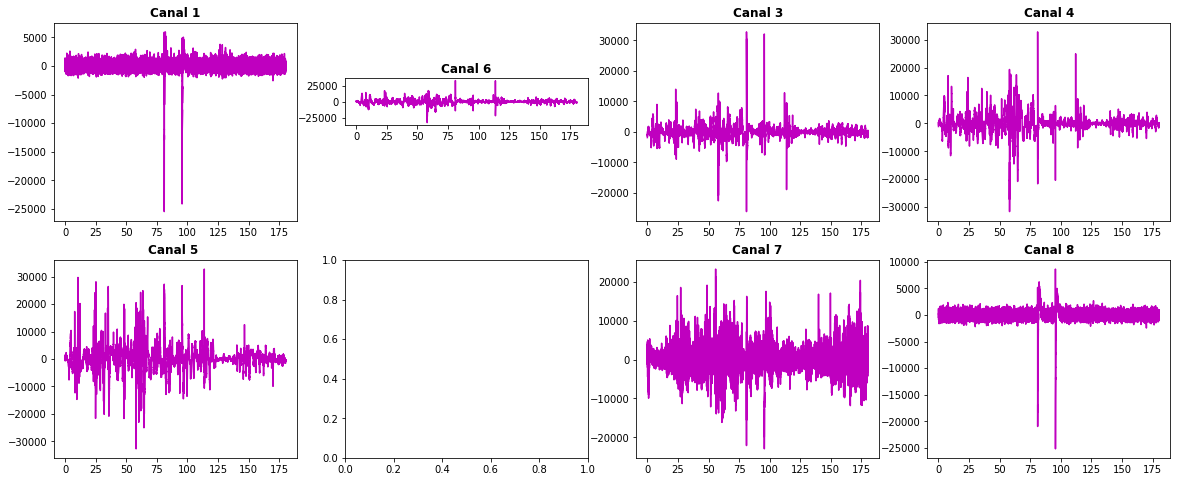

In [ ]:
t = signals.times

plt. subplots(2,4,figsize=(20,8)) #25
plt.subplot2grid((2,4),(0,0))
s1_1 = signals.signal[0]
plt.plot(t, s1_1, color='m')

plt.title('Canal 1', fontweight ="bold")

plt.subplot2grid((2,4),(0,1)) #Este canal não está aparecendo no plot #26
s1_2 = signals.signal[1]
plt.plot(t[1000], s1_2[1000], color='m')
plt.title('Canal 2 ', fontweight ="bold")

plt.subplot2grid((2,4),(0,2)) #27
s1_3 = signals.signal[2]
plt.plot(t, s1_3, color='m')
plt.title('Canal 3', fontweight ="bold")

plt.subplot2grid((2,4),(0,3)) #28
s1_4 = signals.signal[3]
plt.plot(t, s1_4, color='m')
plt.title('Canal 4', fontweight ="bold")

plt.subplot2grid((2,4),(1,0)) #29
s1_5 = signals.signal[4]
plt.plot(t, s1_5, color='m')
plt.title('Canal 5 ', fontweight ="bold")

plt.subplot2grid((8,4),(1,1)) #30
s1_6 = signals.signal[5]
plt.plot(t, s1_6, color='m')
plt.title('Canal 6', fontweight ="bold")

plt.subplot2grid((2,4),(1,2)) #31
s1_7 = signals.signal[6]
plt.plot(t, s1_7, color='m')
plt.title('Canal 7', fontweight ="bold")

plt.subplot2grid((2,4),(1,3)) #32
s1_8 = signals.signal[7]
plt.plot(t, s1_8, color='m')
plt.title('Canal 8', fontweight ="bold")

# Canal 9 ao 16 - Raw

Text(0.5, 1.0, 'Canal 16')

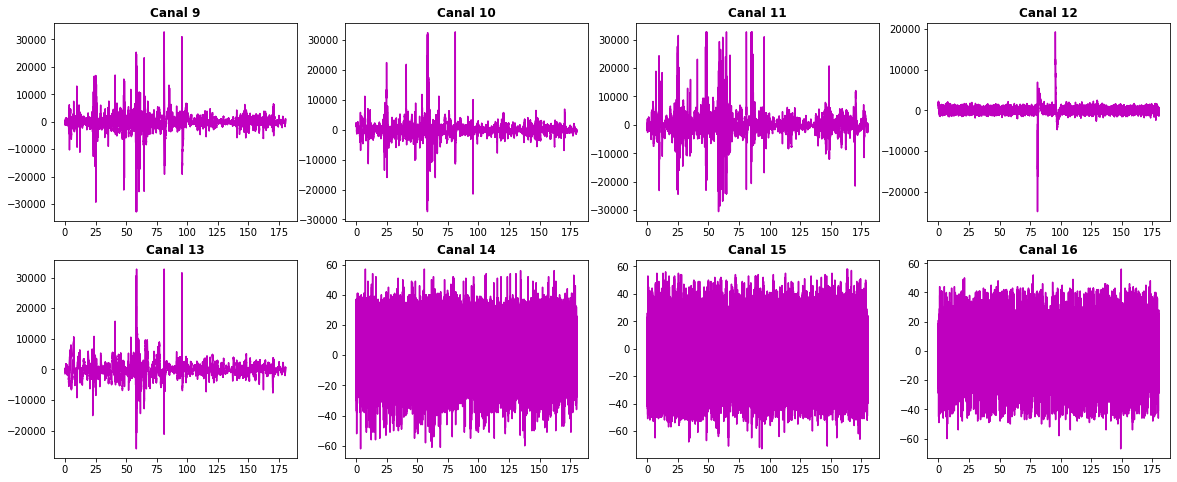

In [ ]:
t = signals.times

plt. subplots(2,4,figsize=(20,8)) #16
plt.subplot2grid((2,4),(0,0))
s1_9 = signals.signal[8]
plt.plot(t, s1_9, color='m')
plt.title('Canal 9', fontweight ="bold")


plt.subplot2grid((2,4),(0,1)) #15
s1_10 = signals.signal[9]
plt.plot(t, s1_10, color='m')
plt.title('Canal 10', fontweight ="bold")

plt.subplot2grid((2,4),(0,2)) #14
s1_11 = signals.signal[10]
plt.plot(t, s1_11, color='m')
plt.title('Canal 11', fontweight ="bold")

plt.subplot2grid((2,4),(0,3)) #13
s1_12 = signals.signal[11]
plt.plot(t, s1_12, color='m')
plt.title('Canal 12', fontweight ="bold")

plt.subplot2grid((2,4),(1,0)) #12
s1_13 = signals.signal[12]
plt.plot(t, s1_13, color='m')
plt.title('Canal 13', fontweight ="bold")

plt.subplot2grid((2,4),(1,1)) #11 ATERRADO
s1_14 = signals.signal[13]
plt.plot(t, s1_14, color='m')
plt.title('Canal 14', fontweight ="bold")

plt.subplot2grid((2,4),(1,2)) #10 ATERRADO
s1_15 = signals.signal[14]
plt.plot(t, s1_15, color='m')
plt.title('Canal 15', fontweight ="bold")

plt.subplot2grid((2,4),(1,3)) #9 ATERRADO
s1_16 = signals.signal[15]
plt.plot(t, s1_16, color='m')
plt.title('Canal 16', fontweight ="bold")

# Canal 17 ao 24 - Raw

Text(0.5, 1.0, 'Canal 24 - 1s')

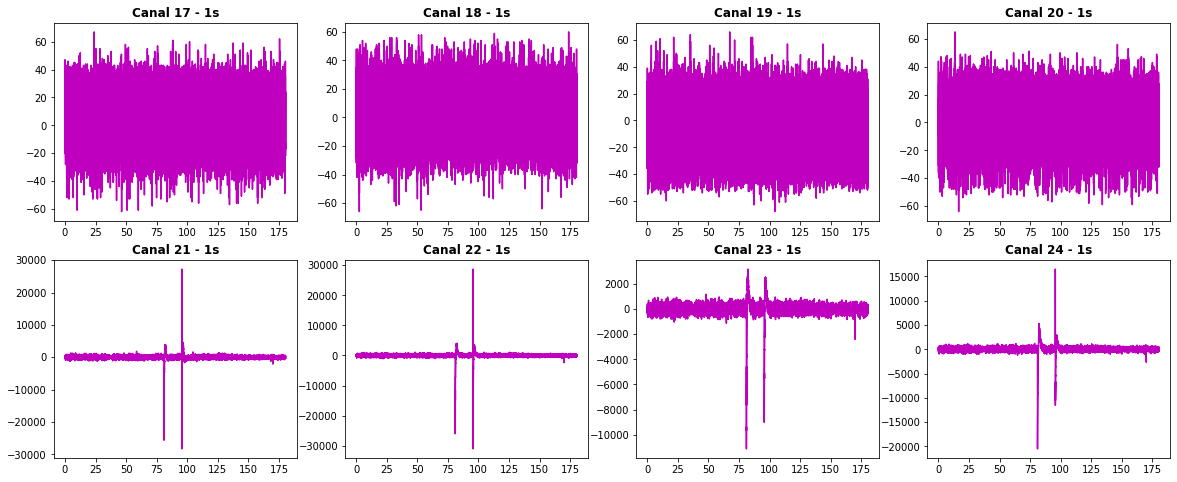

In [ ]:
t = signals.times

plt. subplots(2,4,figsize=(20,8)) #8 ATERRADO
plt.subplot2grid((2,4),(0,0))
s1_17 = signals.signal[16]
plt.plot(t, s1_17, color='m')
plt.title('Canal 17 - 1s', fontweight ="bold")
# plt.xlim(0, 1)
# plt.ylim(3000, -3000)

plt.subplot2grid((2,4),(0,1)) #7 ATERRADO
s1_18 = signals.signal[17]
plt.plot(t, s1_18, color='m')
plt.title('Canal 18 - 1s', fontweight ="bold")

plt.subplot2grid((2,4),(0,2)) #6 ATERRADO
s1_19 = signals.signal[18]
plt.plot(t, s1_19, color='m')
plt.title('Canal 19 - 1s', fontweight ="bold")

plt.subplot2grid((2,4),(0,3)) #5 ATERRADO
s1_20 = signals.signal[19]
plt.plot(t, s1_20, color='m')
plt.title('Canal 20 - 1s', fontweight ="bold")

plt.subplot2grid((2,4),(1,0)) #4
s1_21 = signals.signal[20]
plt.plot(t, s1_21, color='m')
plt.title('Canal 21 - 1s', fontweight ="bold")

plt.subplot2grid((2,4),(1,1))  #3
s1_22 = signals.signal[21]
plt.plot(t, s1_22, color='m')
plt.title('Canal 22 - 1s', fontweight ="bold")

plt.subplot2grid((2,4),(1,2)) #2
s1_23 = signals.signal[22]
plt.plot(t, s1_23, color='m')
plt.title('Canal 23 - 1s', fontweight ="bold")

plt.subplot2grid((2,4),(1,3))  #1
s1_24 = signals.signal[23]
plt.plot(t, s1_24, color='m')
plt.title('Canal 24 - 1s', fontweight ="bold")

# Canal 25 ao 32 - Raw

Text(0.5, 1.0, 'Canal 32')

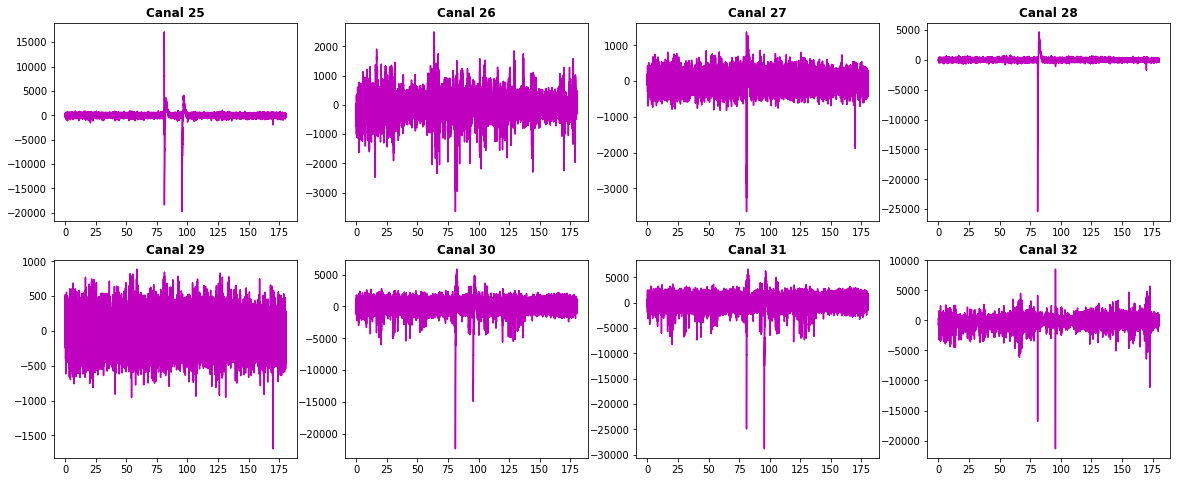

In [ ]:
t = signals.times

plt. subplots(2,4,figsize=(20,8))  #17
plt.subplot2grid((2,4),(0,0))
s1_25 = signals.signal[24]
plt.plot(t, s1_25, color='m')
plt.title('Canal 25', fontweight ="bold")
# plt.xlim(0, 1)
# plt.ylim(3000, -3000)

plt.subplot2grid((2,4),(0,1)) #18
s1_26 = signals.signal[25]
plt.plot(t, s1_26, color='m')
plt.title('Canal 26', fontweight ="bold")

plt.subplot2grid((2,4),(0,2)) #19
s1_27 = signals.signal[26]
plt.plot(t, s1_27, color='m')
plt.title('Canal 27', fontweight ="bold")

plt.subplot2grid((2,4),(0,3)) #20
s1_28 = signals.signal[27]
plt.plot(t, s1_28, color='m')
plt.title('Canal 28', fontweight ="bold")

plt.subplot2grid((2,4),(1,0)) #21
s1_29 = signals.signal[28]
plt.plot(t, s1_29, color='m')
plt.title('Canal 29', fontweight ="bold")

plt.subplot2grid((2,4),(1,1)) #22
s1_30 = signals.signal[29]
plt.plot(t, s1_30, color='m')
plt.title('Canal 30', fontweight ="bold")

plt.subplot2grid((2,4),(1,2)) #23
s1_31 = signals.signal[30]
plt.plot(t, s1_31, color='m')
plt.title('Canal 31', fontweight ="bold")

plt.subplot2grid((2,4),(1,3)) #24
s1_32 = signals.signal[31]
plt.plot(t, s1_32, color='m')
plt.title('Canal 32', fontweight ="bold")

# Espectro médio

(0.0, 500.0)

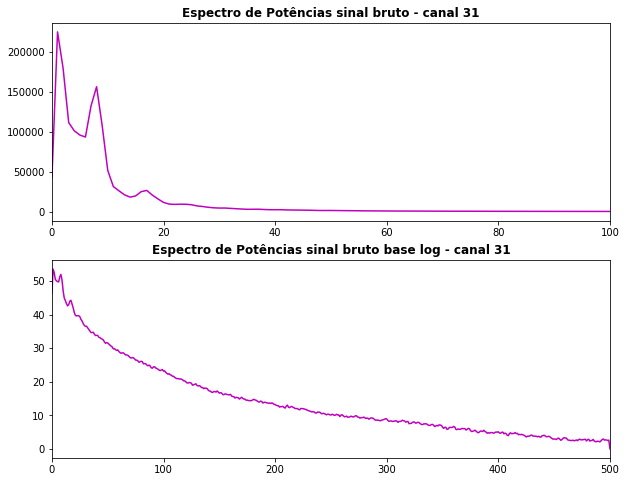

In [ ]:

# função para calcular o espectro de potencia de todos os canais

espectros_raw = []

for k in range(32):
  s = signals.signal[k]
  f, px = welch(s, fs=1000, nperseg=1000,  noverlap=int(0.9*1000))
  espectros_raw.append(px)


# plotando o espectro de um canal aleatório

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(f, espectros_raw[30], color='m')
plt.title('Espectro de Potências sinal bruto - canal 31', fontweight ="bold")
plt.xlim(0,100)

plt.subplot(2,1,2)
plt.plot(f, 10*np.log10(espectros_raw[30]), color='m')
plt.title('Espectro de Potências sinal bruto base log - canal 31', fontweight ="bold")
plt.xlim(0,500)
# ao plotar o sinal na base de log dá para ver outras frequências


(0.0, 100.0)

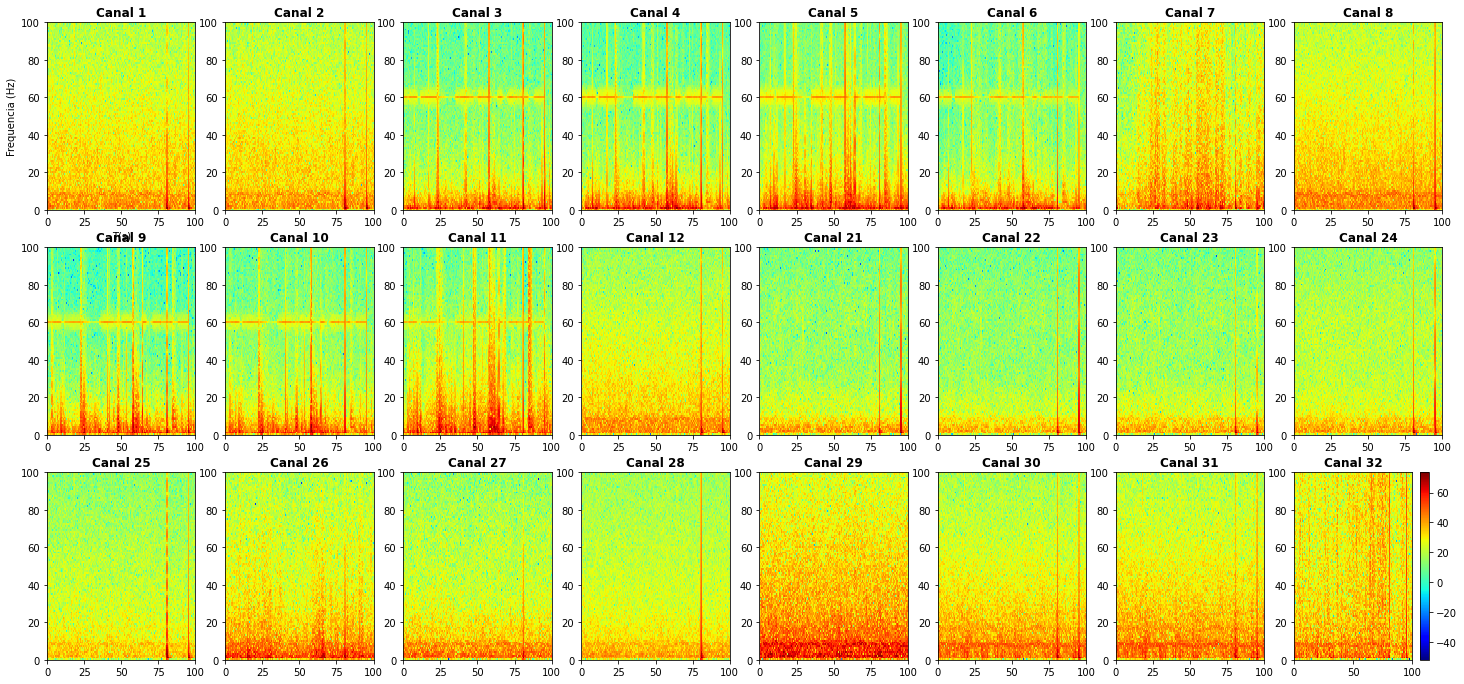

In [ ]:
# função para criar Espectrograma de todos os canais

espect_raw=[]

for k in range(32):
  s = signals.signal[k]
  f, t, Sxx = spectrogram( s, fs=1000, nperseg=1000, noverlap=int(0.9*1000) )
  espect_raw.append(Sxx)

# plotando o espectrograma de todos os canais para ter uma visão geral
Sxxx=np.array(espect_raw)

plt.figure(figsize=(25,20))
plt.subplot(5,8,1)
plt.title('Canal 1', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[0]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)
plt.xlabel('T(s)')
plt.ylabel('Frequencia (Hz)')

plt.subplot(5,8,2)
plt.title('Canal 2', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[1]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,3)
plt.title('Canal 3', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[2]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,4)
plt.title('Canal 4', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[3]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,5)
plt.title('Canal 5', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[4]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,6)
plt.title('Canal 6', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[5]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,7)
plt.title('Canal 7', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[6]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,8)
plt.title('Canal 8', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[7]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,9)
plt.title('Canal 9', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[8]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,10)
plt.title('Canal 10', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[9]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,11)
plt.title('Canal 11', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[10]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,12)
plt.title('Canal 12', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[11]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,13)
plt.title('Canal 21', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[20]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,14)
plt.title('Canal 22', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[21]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,15)
plt.title('Canal 23', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[22]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,16)
plt.title('Canal 24', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[23]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,17)
plt.title('Canal 25', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[24]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,18)
plt.title('Canal 26', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[25]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,19)
plt.title('Canal 27', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[26]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,20)
plt.title('Canal 28', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[27]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,21)
plt.title('Canal 29', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[28]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,22)
plt.title('Canal 30', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[29]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,23)
plt.title('Canal 31', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[30]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,24)
plt.colorbar()
plt.title('Canal 32', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(Sxxx[31]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

# É possível ver ruídos e 60Hz em praticamente todos os canais




# Filtrando data1
* Filtro passa banda de 0.1 até 30Hz


In [ ]:
b = firwin(300, [0.1, 15], pass_zero='bandpass', fs=1000)

filt = []

for k in range(32):
  s = signals.signal[k] - np.mean(signals.signal[k])
  s_filt = filtfilt(b, 1, s)
  filt.append(s_filt)

Text(0, 0.5, 'Signal')

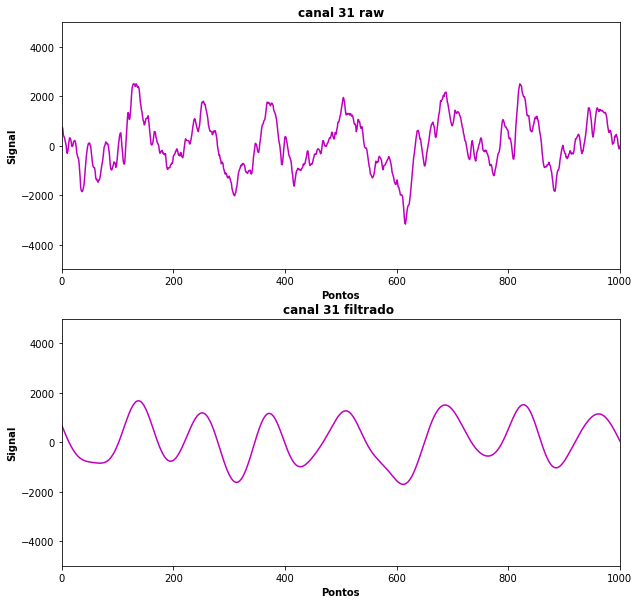

In [ ]:


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(s1_31, color='m')
plt.title('canal 31 raw', fontweight ="bold") #não tem mais 60hz
plt.xlim(0,1000)
plt.ylim(-5000,5000)
plt.xlabel('Pontos', fontweight ="bold") # CONFERIR!!!!! ESCALA TEMPORAL
plt.ylabel('Signal', fontweight ="bold")

plt.subplot(2,1,2)
plt.plot(filt[30], color='m')
plt.title('canal 31 filtrado ', fontweight ="bold")
plt.ylim(-5000,5000)
plt.xlim(0,1000)

plt.xlabel('Pontos', fontweight ="bold")
plt.ylabel('Signal', fontweight ="bold")

Text(0, 0.5, 'Power')

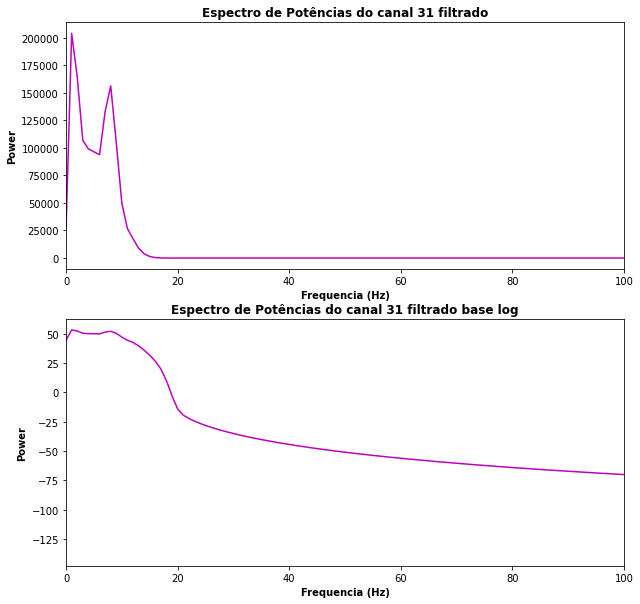

In [ ]:
#fazendo espectro de potencia de um canal aleatório apos filtrar - Canal 31

f, p = welch(filt[30], fs=1000, nperseg=1000, noverlap=500)

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(f, p, color='m')
plt.title('Espectro de Potências do canal 31 filtrado', fontweight ="bold") #não tem mais 60hz
plt.xlim(0,100)
plt.xlabel('Frequencia (Hz)', fontweight ="bold")
plt.ylabel('Power', fontweight ="bold")

plt.subplot(2,1,2)
plt.plot(f, 10*np.log10(p), color='m')
plt.title('Espectro de Potências do canal 31 filtrado base log', fontweight ="bold") #não tem mais 60hz
plt.xlim(0,100)
plt.xlabel('Frequencia (Hz)', fontweight ="bold")
plt.ylabel('Power', fontweight ="bold")

(0.0, 100.0)

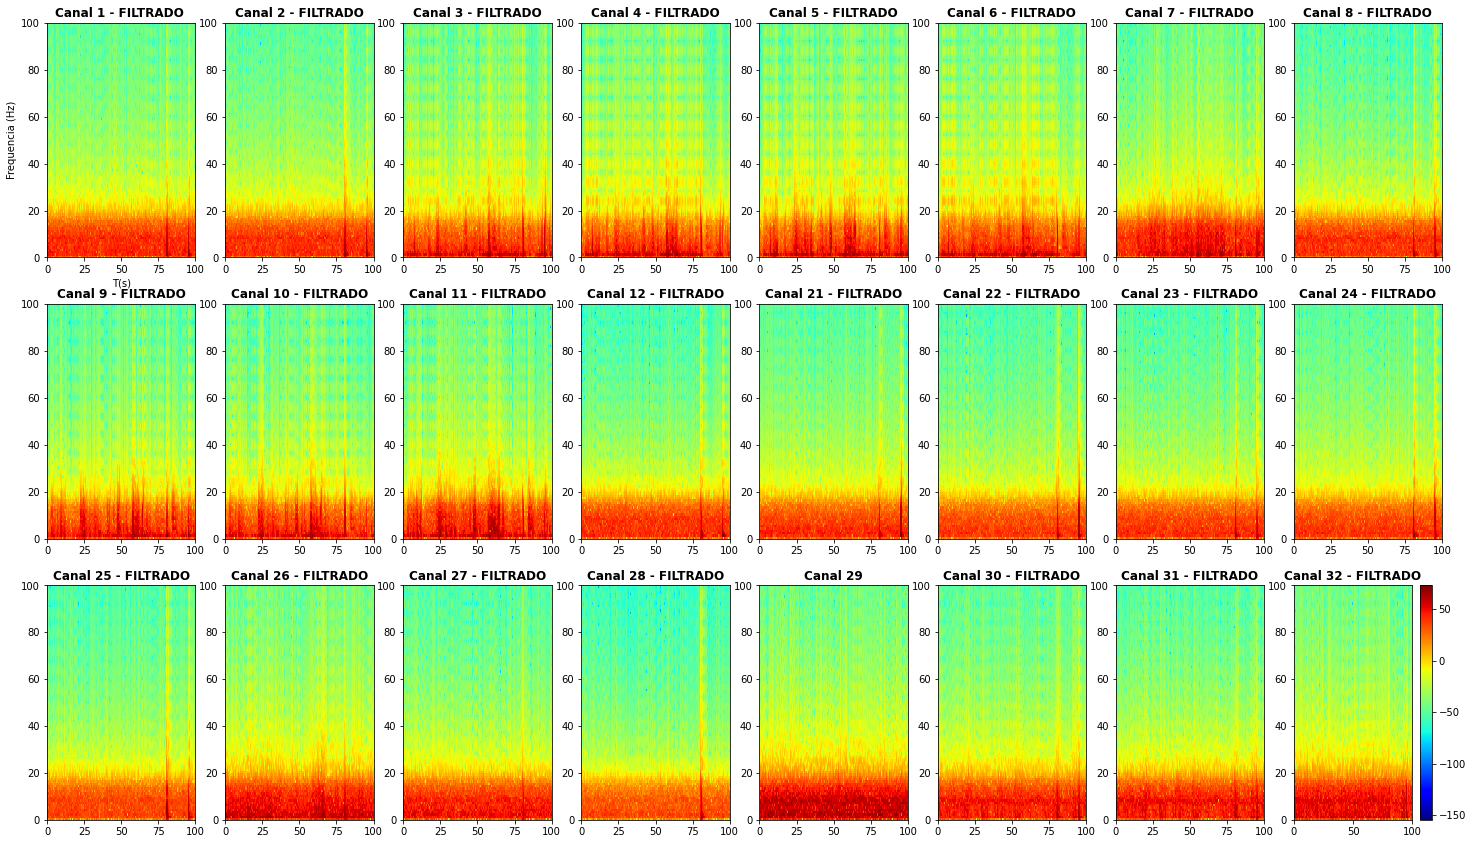

In [ ]:
# função para criar Espectrograma de todos os canais filtrados

espect_filtrado=[]

for k in range(32):
  sf = filt[k]
  f, t, Sxx = spectrogram( sf, fs=1000, nperseg=1000, noverlap=int(0.9*1000) )
  espect_filtrado.append(Sxx)

espect_filt=np.array(espect_filtrado)

plt.figure(figsize=(25,25))
plt.subplot(5,8,1)
plt.title('Canal 1 - FILTRADO ', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[0]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)
plt.xlabel('T(s)')
plt.ylabel('Frequencia (Hz)')

plt.subplot(5,8,2)
plt.title('Canal 2 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[1]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,3)
plt.title('Canal 3 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[2]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,4)
plt.title('Canal 4 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[3]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,5)
plt.title('Canal 5 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[4]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,6)
plt.title('Canal 6 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[5]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,7)
plt.title('Canal 7 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[6]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,8)
plt.title('Canal 8 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[7]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,9)
plt.title('Canal 9 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[8]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,10)
plt.title('Canal 10 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[9]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,11)
plt.title('Canal 11 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[10]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,12)
plt.title('Canal 12 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[11]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,13)
plt.title('Canal 21 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[20]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,14)
plt.title('Canal 22 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[21]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,15)
plt.title('Canal 23 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[22]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,16)
plt.title('Canal 24 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[23]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,17)
plt.title('Canal 25 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[24]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,18)
plt.title('Canal 26 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[25]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,19)
plt.title('Canal 27 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[26]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,20)
plt.title('Canal 28 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[27]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,21)
plt.title('Canal 29', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[28]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,22)
plt.title('Canal 30 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[29]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,23)
plt.title('Canal 31 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[30]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

plt.subplot(5,8,24)
plt.colorbar()
plt.title('Canal 32 - FILTRADO', fontweight ="bold")
plt.pcolormesh(t, f, 10*np.log10(espect_filt[31]), cmap='jet')
plt.ylim(0, 100)
plt.xlim(0,100)

> # Coerência

* Essa matriz de eletrodos aborda 3 regiões:
  - Núcleo Accumbens (canais 20, 21, 22, 23);
  - Hipocampo dorsal (canais 0-7 e 24-31);
  - Hipocampo ventral (canais 8, 9, 10, 11);
  
  - ATERRADOS: canais 13-19;
  - canal 12 era para estar aterrado mas está com sinal, então será desconsiderado.

Text(0, 0.5, 'Frequências')

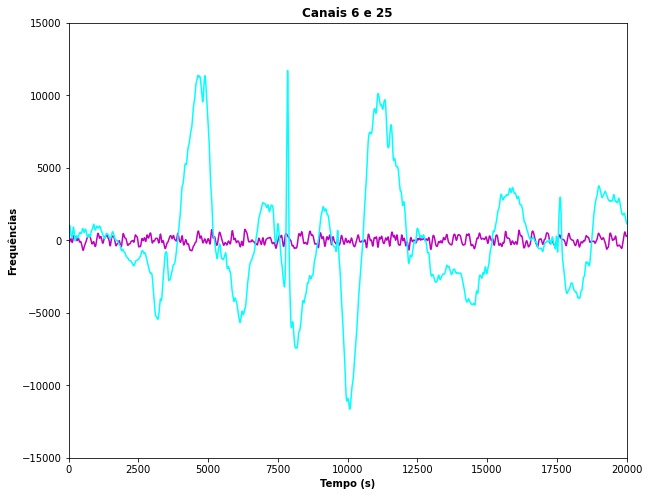

In [ ]:
# plotando dois canais de regiões diferentes: Núcleo Accumbens e Hipocampo dorsal

plt.figure(figsize=(10,8))
plt.plot( filt[21], color='m') # região: Núcleo Accumbens
plt.plot( filt[5], color='cyan') #região: Hipocampo dorsal
plt.title('Canais 6 e 25', fontweight='bold')
plt.xlim(0,20000)
plt.xlabel('Tempo (s)', fontweight='bold')
plt.ylim(-15000,15000)
plt.ylabel('Frequências', fontweight='bold')



Text(0.5, 1.0, 'Coerência canais 6(Núcleo Accumbens) e 25(HPC dorsal)')

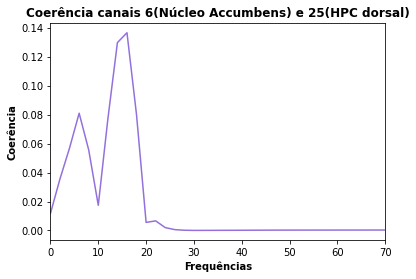

In [ ]:
f, c = coherence(filt[24], filt[5], nperseg=500, fs=1000)
plt.plot(f, c, color='mediumpurple')
plt.xlim(0,70)
plt.xlabel('Frequências', fontweight='bold')
plt.ylabel('Coerência', fontweight='bold')
plt.title('Coerência canais 6(Núcleo Accumbens) e 25(HPC dorsal)', fontweight='bold')

Text(0, 0.5, 'Frequências')

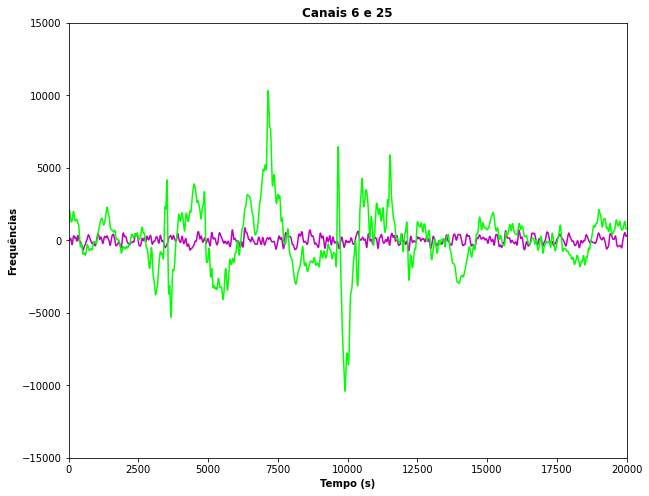

In [ ]:
# plotando dois canais de regiões diferentes: Núcleo Accumbens e Hipocampo ventral

plt.figure(figsize=(10,8))
plt.plot( filt[23], color='m') # região: Núcleo Accumbens
plt.plot( filt[9], color='lime') #região: Hipocampo ventral
plt.title('Canais 6 e 25', fontweight='bold')
plt.xlim(0,20000)
plt.xlabel('Tempo (s)', fontweight='bold')
plt.ylim(-15000,15000)
plt.ylabel('Frequências', fontweight='bold')


Text(0.5, 1.0, 'Coerência canais 24(Núcleo Accumbens) e 10(HPC ventral)')

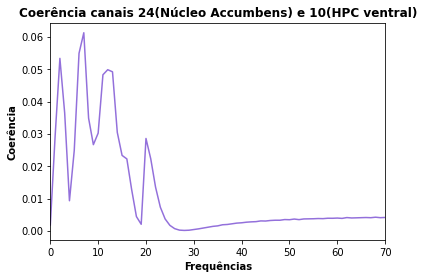

In [ ]:
f, c = coherence(filt[23], filt[9], nperseg=1000, fs=1000)
plt.plot(f, c, color='mediumpurple')
plt.xlim(0,70)
plt.xlabel('Frequências', fontweight='bold')
plt.ylabel('Coerência', fontweight='bold')
plt.title('Coerência canais 24(Núcleo Accumbens) e 10(HPC ventral)', fontweight='bold')

Text(0, 0.5, 'Frequências')

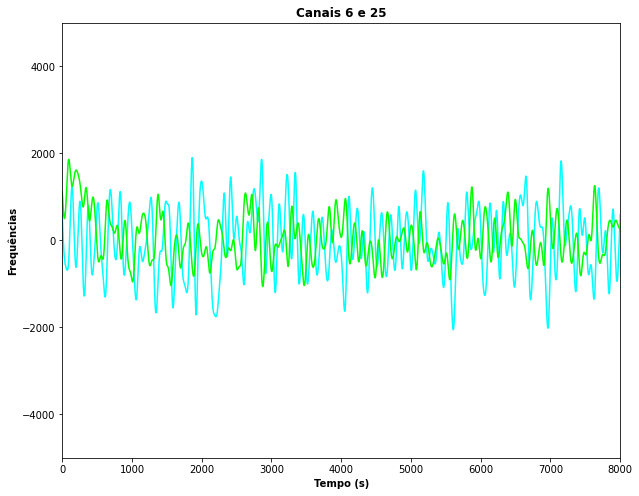

In [ ]:
# plotando dois canais de regiões diferentes: Hipocampo dorsal e Hipocampo ventral

plt.figure(figsize=(10,8))
plt.plot( filt[29], color='cyan') # região: Hipocampo dorsal
plt.plot( filt[11], color='lime') #região: Hipocampo ventral
plt.title('Canais 6 e 25', fontweight='bold')
plt.xlim(0,8000)
plt.xlabel('Tempo (s)', fontweight='bold')
plt.ylim(-5000,5000)
plt.ylabel('Frequências', fontweight='bold')

Text(0.5, 1.0, 'Coerência canais 24(Núcleo Accumbens) e 10(HPC ventral)')

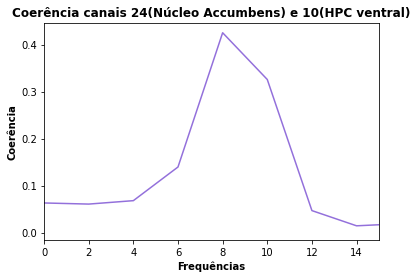

In [ ]:
f, c = coherence(filt[29], filt[11], nperseg=500, fs=1000)
plt.plot(f, c, color='mediumpurple')
plt.xlim(0,15)
plt.xlabel('Frequências', fontweight='bold')
plt.ylabel('Coerência', fontweight='bold')
plt.title('Coerência canais 24(Núcleo Accumbens) e 10(HPC ventral)', fontweight='bold')

> # Acoplamento fase-amplitude

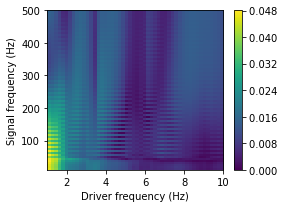

In [ ]:
# Acoplamento fase-amplitude região Núcleo Accumbens

low_fq_range = np.linspace(1, 10, 50) # aqui está escrito que o filtro baixo será de frequencia 1 a 10Hz com um intervalo de 50

estimator = Comodulogram(fs=1000, low_fq_range=low_fq_range,
                             low_fq_width=1, method='ozkurt',
                             progress_bar=False)
estimator.fit(filt[23])
estimator.plot( )

plt.show()

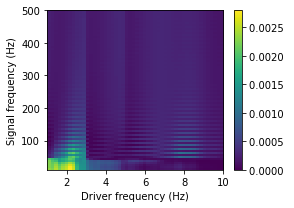

In [ ]:
# Acoplamento fase-amplitude região Hipocampo dorsal

low_fq_range = np.linspace(1, 10, 50)
estimator = Comodulogram(fs=1000, low_fq_range=low_fq_range,
                             low_fq_width=1, method='penny',
                             progress_bar=False)
estimator.fit(filt[3])
estimator.plot( )


plt.show()

[........................................] 100% | 32.06 sec | comodulogram: penny 


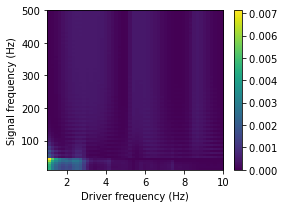

In [ ]:
# Acoplamento fase-amplitude região Hipocampo ventral

low_fq_range = np.linspace(1, 10, 50)

estimator = Comodulogram(fs=1000, low_fq_range=low_fq_range,
                             low_fq_width=1, method='penny',
                             progress_bar=True)
estimator.fit(filt[8])
estimator.plot( )

plt.show()